<a href="https://colab.research.google.com/github/awarbler/homework3/blob/main/Homework3Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### <p style="text-align: center;">EE 381V: Statistical Machine Learning</p>
# <p style="text-align: center;">Homework 3: Programming Assignments</p>
## <p style="text-align: center;">Total points: 85  </p>
## <p style="text-align: center;">Due: November 7 by 11:59 pm (submission via Gradescope)</p>

Ideally, your solution to the assignments should be written in and submitted as a **Jupyter notebook**. Please make sure your code runs and the graphics (along with anything else that you want to be considered) are displayed in your notebook before submitting.

For the theoretical parts of the questions below (e.g., computation of gradients), the most convenient approach is to type the solution in the provided spaces ("Markdown" cells) using LaTeX (if not familiar with LaTeX, please check the markdown cells below stating questions for examples of writing equations in LaTeX). Alternatively, you could write down the solution on paper and submit a pdf file of the scan/photo.

# <font color='blue'> Problem 1: Random Forest (22 pts) </font>

The goal of this problem is to explore the effect of feature selection using dataset 'loan.csv'.

Select the `loan_status` column as the target column.  


**Part 1: (4 pts)** Split the dataset into train and test set with 25% data in test set and random_state = 42. Perform [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) on the dataset. Print the total number of features.

**Part 2: (4 pts)** Use the dataset to create a `RandomForestClassifier(n_estimators=5, random_state=42)` model and print the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to show the precision, recall and F1 score based on the test set.  


**Part 3: (4 pts)** Use $\chi^2$ test to select the top 100, 30 and 10 features using [SelectKBest](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection) module. Train a random forest model and print the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for each of the trained models.  

**Note:** $\chi^2$ test requires non-negative values only for all features. Since we have performed Min-Max scaling previously (where the default behavior is to scale features between 0 and 1, there should not be any problem performing this test.)   

**Part 4: (5 pts)** [Plot the ROC curves](https://github.com/justmarkham/scikit-learn-tips/blob/master/notebooks/21_plot_roc_curve.ipynb) for all of the 4 models.  

**Part 5: (5 pts)** Plot the feature importance for each of the 4 random forest models that you have trained to show the top 5 features. ([Get feature names after feature selection](https://stackoverflow.com/a/43765224), [Plot feature importance using Pandas and matplotlib](https://stackoverflow.com/a/51520906))

In [1]:
'''import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("loan.csv", low_memory=False)

df = dataset.fillna(0)

def LoanResult(status):
    if (status == 'Fully Paid') or (status == 'Current'):
        return 1
    else:
        return 0

df['loan_status'] = df['loan_status'].apply(LoanResult)

df = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
             'emp_length', 'home_ownership','annual_inc', 'verification_status', 'loan_status',
             'purpose','addr_state', 'dti','open_acc', 'pub_rec', 'revol_bal', 'revol_util',
             'initial_list_status', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
             'application_type', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal', 'chargeoff_within_12_mths',
             'pub_rec_bankruptcies', 'tax_liens', 'debt_settlement_flag']]
df_cat = df.select_dtypes(exclude=['int64', 'float64'])
df = pd.get_dummies(df, df_cat.columns.values)
df.head()'''

'import os, sys, re\nimport time\nimport numpy as np\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\n\ndataset = pd.read_csv("loan.csv", low_memory=False)\n\ndf = dataset.fillna(0)\n\ndef LoanResult(status):\n    if (status == \'Fully Paid\') or (status == \'Current\'):\n        return 1\n    else:\n        return 0\n\ndf[\'loan_status\'] = df[\'loan_status\'].apply(LoanResult)\n\ndf = df[[\'loan_amnt\', \'funded_amnt\', \'funded_amnt_inv\', \'term\', \'int_rate\', \'installment\', \'grade\', \'sub_grade\',\n             \'emp_length\', \'home_ownership\',\'annual_inc\', \'verification_status\', \'loan_status\',\n             \'purpose\',\'addr_state\', \'dti\',\'open_acc\', \'pub_rec\', \'revol_bal\', \'revol_util\',\n             \'initial_list_status\', \'recoveries\',\'collection_recovery_fee\', \'last_pymnt_d\', \'last_pymnt_amnt\',\n             \'application_type\', \'tot_coll_amt\', \'tot_cur_bal\', \'avg_cur_bal\', \'chargeoff_within_12_mths\',\n   

### Your answer:

#### Part 1 (**4 pts**)

In [1]:
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Import the libraries we need
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# print(tf.__version__)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# use google drive for csv files
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/ML/loan.csv', low_memory=False)

In [4]:
# initial inspection and sanity checks
print('Shape of dataset', dataset.shape)
print('\n Column names: \n', dataset.columns.tolist()) #list of all columns

print('\nMissing Values: \n', dataset.isnull().sum()) # counts all of the NaN/None values per column

Shape of dataset (226067, 145)

 Column names: 
 ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'op

In [5]:
# look at data

print('-------------- Data exploration-----------')
# print summaries together if I can get them to save as pdf
print('\n----------Summary-----------')
print(dataset.describe())
print('\n----------Data Types-----------')
print(dataset.dtypes) # column of data types
print('\n----------Info -----------')
print(dataset.info()) # overview of the dataset counts types and memory

-------------- Data exploration-----------

----------Summary-----------
        id  member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count  0.0        0.0  226067.000000  226067.000000    226067.000000   
mean   NaN        NaN   16039.026594   16039.026594     16036.036049   
std    NaN        NaN   10126.547815   10126.547815     10127.351049   
min    NaN        NaN    1000.000000    1000.000000       725.000000   
25%    NaN        NaN    8200.000000    8200.000000      8200.000000   
50%    NaN        NaN   14000.000000   14000.000000     14000.000000   
75%    NaN        NaN   22000.000000   22000.000000     22000.000000   
max    NaN        NaN   40000.000000   40000.000000     40000.000000   

            int_rate    installment    annual_inc  url  desc  ...  \
count  226067.000000  226067.000000  2.260670e+05  0.0   0.0  ...   
mean       12.928615     466.639016  8.166245e+04  NaN   NaN  ...   
std         5.205944     285.985352  9.589272e+04  NaN   NaN  ...   
mi

The above results tell me the data et the loan amounts the aver loan amounts the 25, 50th median and 75 percitiles are 8200 1400000 , 22000 showing typical loan amounts cluster around these valuse

gives me the data types, this tells me the dataset is mostly numeric but several columns will need encoding before modeling convverting strings like 36 months or rent to numeric form.

dates are stored as object strings mayneed to be converted
pd.to_datetime() if I am going to use them

confirmed structure and memory usage

missing date and some irrelevant or very sparse columns
url, desc harship etc



In [6]:
print('\n----------Describe numeric columns -----------')
print(dataset.describe(include='all')) # includes object categorical columns
print('\n----------Duplicates -----------')
print(dataset.duplicated().sum()) # overview of the dataset counts types and memory
print('\n----------Unique value count -----------')
print(dataset.nunique().sort_values()) # counts the unique values
print('\n----------IsNull -----------')
print(dataset.isnull().sum()) # counts all of the null values per column
print('\n----------Missing values per column -----------')
missing= dataset.isna().sum() # counts all of the NaN/None values per column
if missing.sum() > 0:
  print('Found missing data, do imputation', missing[missing > 0])
else:
  print('No missing data')


----------Describe numeric columns -----------
         id  member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count   0.0        0.0  226067.000000  226067.000000    226067.000000   
unique  NaN        NaN            NaN            NaN              NaN   
top     NaN        NaN            NaN            NaN              NaN   
freq    NaN        NaN            NaN            NaN              NaN   
mean    NaN        NaN   16039.026594   16039.026594     16036.036049   
std     NaN        NaN   10126.547815   10126.547815     10127.351049   
min     NaN        NaN    1000.000000    1000.000000       725.000000   
25%     NaN        NaN    8200.000000    8200.000000      8200.000000   
50%     NaN        NaN   14000.000000   14000.000000     14000.000000   
75%     NaN        NaN   22000.000000   22000.000000     22000.000000   
max     NaN        NaN   40000.000000   40000.000000     40000.000000   

              term       int_rate    installment   grade sub_grade  ...  \


The data above tells me that main loan variables , terms, and grade and sub grades

there are no duplicates
I have some d1 unique values example policy code which I think can be dropped

id, member id , url and desc are completley empty they can be dropped

I will need to do imputation on the others or exclusion

61 colomns have at least some missing values

I think i want to drp coluns with > 90 percing missing like hardship and settlement


In [7]:
# teachers code

df = dataset.fillna(0) # this fills the missing values to zero all missing nan entries are replaces with a zero a quick but crude way to handle missing data

def LoanResult(status):
    """ the teacher defines a helper function returns 1 if the the loan is good, fully paid or current, returns a zero if charged off or in default, this will convert the labels into binary numeri target for classfication """


    if (status == 'Fully Paid') or (status == 'Current'):
        return 1
    else:
        return 0

df['loan_status'] = df['loan_status'].apply(LoanResult)
""" this will keep the selected subset of useful columns ignoring undeeded or redundant ones"""

df = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
             'emp_length', 'home_ownership','annual_inc', 'verification_status', 'loan_status',
             'purpose','addr_state', 'dti','open_acc', 'pub_rec', 'revol_bal', 'revol_util',
             'initial_list_status', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
             'application_type', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal', 'chargeoff_within_12_mths',
             'pub_rec_bankruptcies', 'tax_liens', 'debt_settlement_flag']]
df_cat = df.select_dtypes(exclude=['int64', 'float64']) # creates a new dataframe that contains categorical non numeric columns

df = pd.get_dummies(df, df_cat.columns.values) # this converts all of the catergorical strings coluns inot dummy indicators 0 -1 coluns createing one colun per category
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,...,last_pymnt_d_Feb-2019,last_pymnt_d_Jan-2019,last_pymnt_d_Jul-2018,last_pymnt_d_Nov-2018,last_pymnt_d_Oct-2018,last_pymnt_d_Sep-2018,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y
0,2500,2500,2500.0,13.56,84.92,55000.0,1,18.24,9.0,1.0,...,True,False,False,False,False,False,True,False,True,False
1,30000,30000,30000.0,18.94,777.23,90000.0,1,26.52,13.0,1.0,...,True,False,False,False,False,False,True,False,True,False
2,5000,5000,5000.0,17.97,180.69,59280.0,1,10.51,8.0,0.0,...,True,False,False,False,False,False,True,False,True,False
3,4000,4000,4000.0,18.94,146.51,92000.0,1,16.74,10.0,0.0,...,True,False,False,False,False,False,True,False,True,False
4,30000,30000,30000.0,16.14,731.78,57250.0,1,26.35,12.0,0.0,...,True,False,False,False,False,False,True,False,True,False


In [8]:
#sanity check of the teachers work to confirm everything worked approprately
print('Sanity check')
print('Shape of dataset', df.shape)
# ensure loan status existe and is binary
print('\n TArget column Check: ')
print(df['loan_status'].value_counts())
# ensure all coluns are numeric
print('\n Data Type Summary: \n', df.dtypes.value_counts())
print('\n Missing Values: \n', df.isna().sum()) # counts all of the NaN/None values per column
# sample dummy variable expanse
print("n Basic numeric sanity states: ")
print(df.describe().T[['min', 'max', 'mean']].head(10))
# verify target distribution roughly balanced
positive_ratio = df['loan_status'].mean()
print(f"\nPercentage of good loans(1): {positive_ratio*100:.2f}%")
# check that i didnt lose any rows
print(f"original dataset rows: {dataset.shape[0]}, after cleaning: {df.shape[0]}")



Sanity check
Shape of dataset (226067, 161)

 TArget column Check: 
loan_status
1    222729
0      3338
Name: count, dtype: int64

 Data Type Summary: 
 bool       140
float64     17
int64        4
Name: count, dtype: int64

 Missing Values: 
 loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
int_rate                       0
installment                    0
                              ..
last_pymnt_d_Sep-2018          0
application_type_Individual    0
application_type_Joint App     0
debt_settlement_flag_N         0
debt_settlement_flag_Y         0
Length: 161, dtype: int64
n Basic numeric sanity states: 
                     min         max          mean
loan_amnt        1000.00    40000.00  16039.026594
funded_amnt      1000.00    40000.00  16039.026594
funded_amnt_inv   725.00    40000.00  16036.036049
int_rate            5.31       30.99     12.928615
installment        30.48     1670.15    466.639016
annual_inc          0.00  975

Added columns no lost records 226067

Target columns shows us there is a strong class imbalance

bool 140
float64 17
 int64 4

no missing values across the columns fully cleaned

need to balance

This also tells us how many columns we have after encoding

Sanity check
Shape of dataset (226067, 161)

161 but one is our target so we have 160


In [9]:
# split the data sn appy min max scaling

# separate features X and target y
X = df.drop('loan_status', axis=1) # drop loan_status it is the target variable not an input featured it is the predicted target
y = df['loan_status']
# Get our target variable and features and split them into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# add the scaler to put all numeric feateurs between 0 and 1 so large valued features dont dominate smallones like interest rate
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# print
print('\n Total number of features after encoding: ', X_train_scaled.shape[1])



 Total number of features after encoding:  160


##### Visualization

/tmp/ipython-input-661566493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=['orange', 'green'])


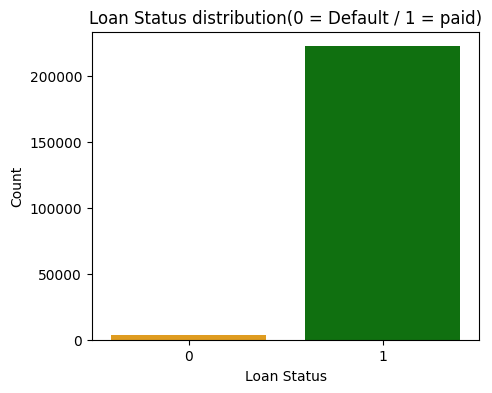

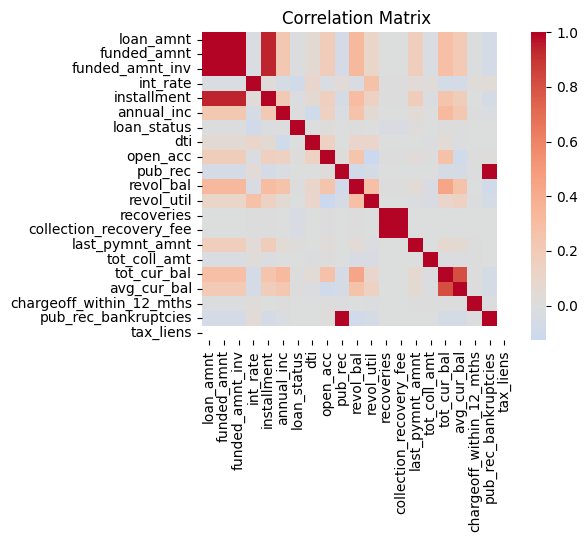

/tmp/ipython-input-661566493.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette=['orange', 'green'])


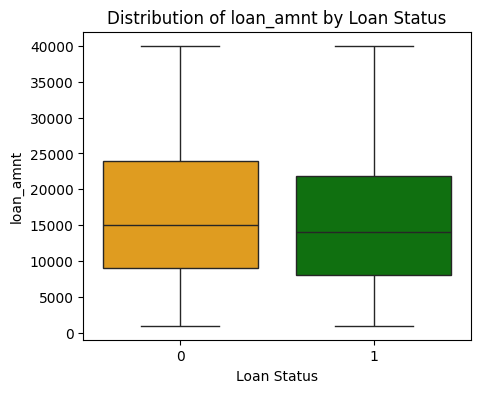

/tmp/ipython-input-661566493.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette=['orange', 'green'])


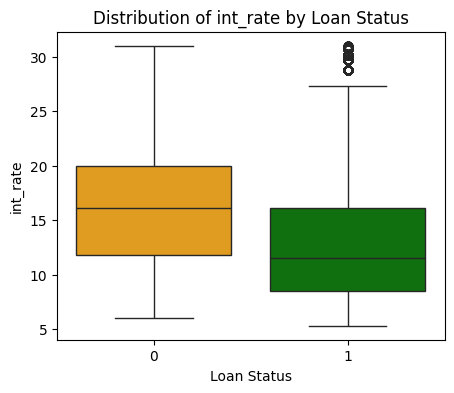

/tmp/ipython-input-661566493.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette=['orange', 'green'])


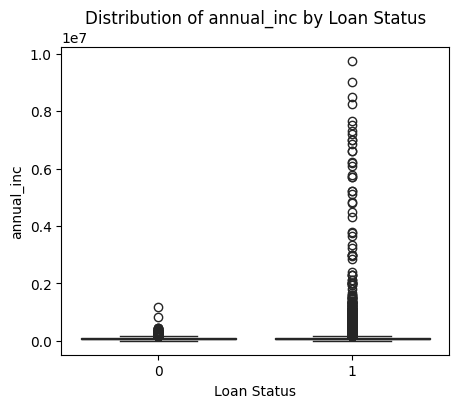

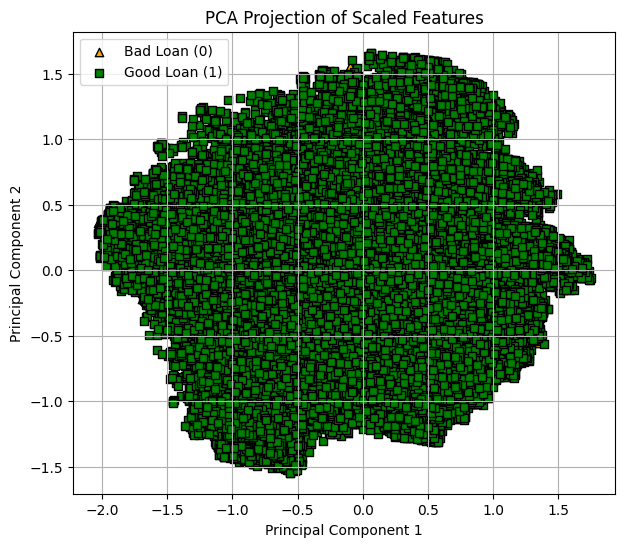

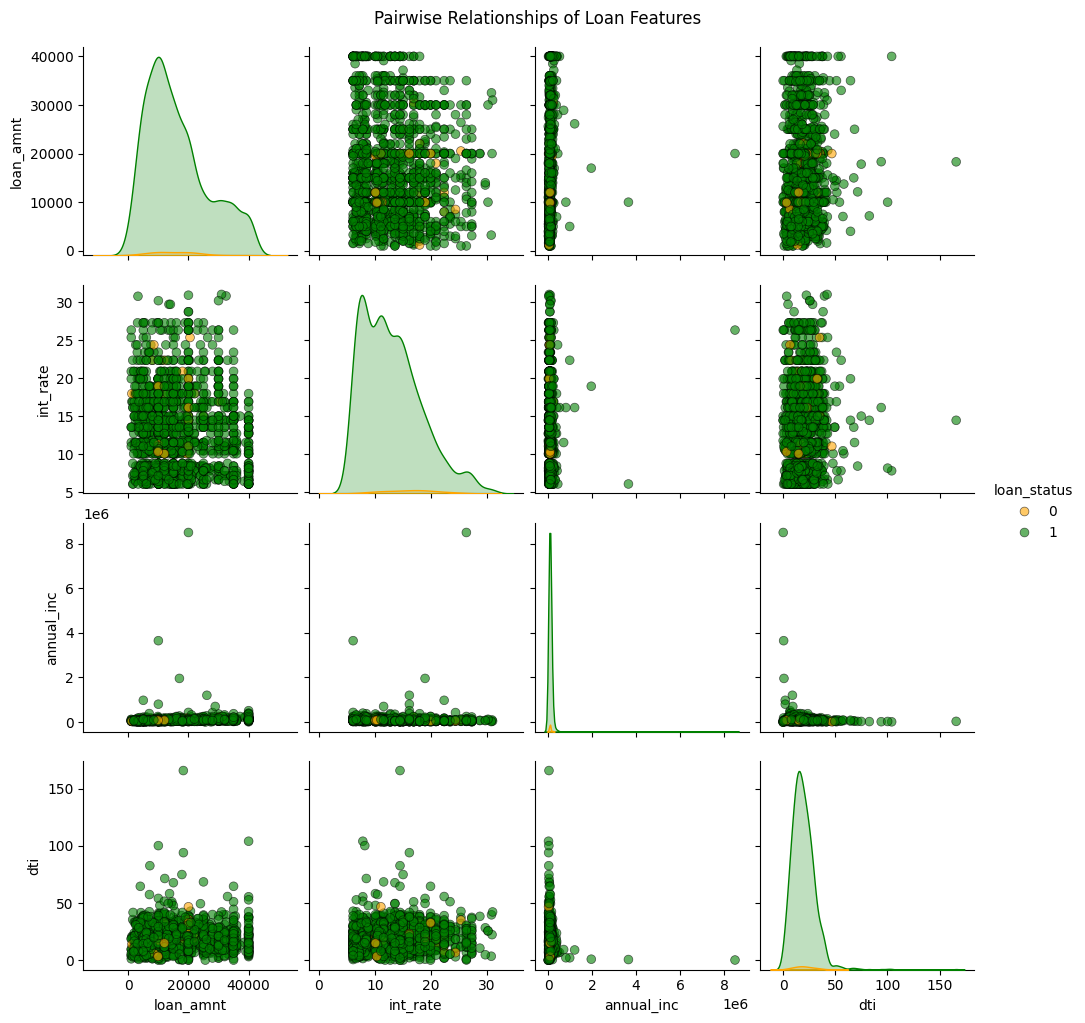

In [10]:
from sklearn.decomposition import PCA
# plots
plt.figure(figsize=(5,4))
sns.countplot(x=y, palette=['orange', 'green'])
plt.title('Loan Status distribution(0 = Default / 1 = paid)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(5,4))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# boxplots compare distributions across loan status
for col in ['loan_amnt', 'int_rate',  'annual_inc']:
    if col in df.columns:
        plt.figure(figsize=(5,4))
        sns.boxplot(x='loan_status', y=col, data=df, palette=['orange', 'green'])
        plt.title(f'Distribution of {col} by Loan Status')
        plt.xlabel('Loan Status')
        plt.ylabel(col)
        plt.show()

# pca visualization

''' Note the following two plots were adapted from the professors code examples. chatgpt assisted in modifyon the visualization code i could correctly display the dataset in the project. '''

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
plt.figure(figsize=(7,6))
plt.scatter(X_pca[:,0][y_train==0], X_pca[:,1][y_train==0],
            c='orange', marker='^', label='Bad Loan (0)', edgecolors='k')
plt.scatter(X_pca[:,0][y_train==1], X_pca[:,1][y_train==1],
            c='green', marker='s', label='Good Loan (1)', edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Scaled Features")
plt.legend()
plt.grid(True)
plt.show()

sample_df = df.sample(n=1500, random_state=42)
palette = {0: 'orange', 1: 'green'}
sns.pairplot(sample_df,
             vars=['loan_amnt','int_rate','annual_inc','dti'],
             hue='loan_status',
             palette=palette,
             plot_kws={'alpha':0.6, 's':40, 'edgecolor':'k'})
plt.suptitle("Pairwise Relationships of Loan Features", y=1.02)
plt.show()

Comments on the plots

The plots confirm that the data is imbalanced the green bar graph is more than 95 % of the total samples.

will need to use blance metrics clas weigting and resampling to avoid bias toward the majority class


CM - dark red blocks is self correlation
small clusters of darker red
red clusters indicate multicollinearity
most features are weakly correlated
scaling could help simplify the model or remove redundant columns


consider feature selectoin to reduce collinearity
, key predictor for riskiness
apply log or robust scaling ,PCA shows that the data isnt linearly separable so tree boosting models are appropriate



#### Part 2 (**4 pts**)

In [11]:
# random forest model with all features
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
#using 5 estimators per instructions
rf = RandomForestClassifier(n_estimators=5, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# compute metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)


Random Forest Accuracy: 0.99
Random Forest Precision:  0.9904
Random Forest Recall: 99.6641

Classifcation Report
              precision    recall  f1-score   support

 Bad Loan(0)       0.63      0.37      0.46       850
Good Loan(1)       0.99      1.00      0.99     55667

    accuracy                           0.99     56517
   macro avg       0.81      0.68      0.73     56517
weighted avg       0.98      0.99      0.99     56517


Confusion Matrix
[[  313   537]
 [  187 55480]]


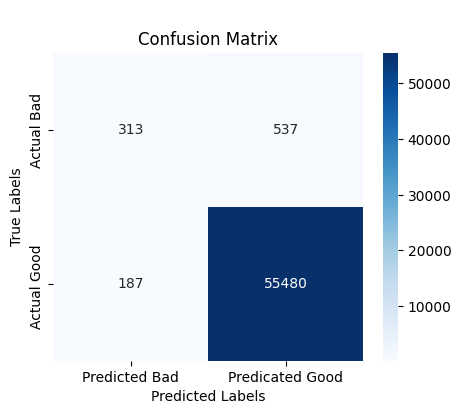

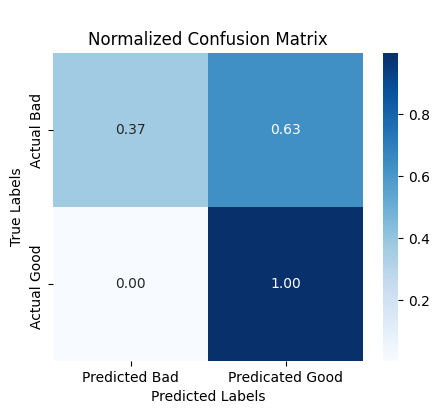


Feature Importance
                      Feature  Importance
13            last_pymnt_amnt    0.177221
150     last_pymnt_d_Feb-2019    0.084104
151     last_pymnt_d_Jan-2019    0.049078
147            last_pymnt_d_0    0.039918
9                   revol_bal    0.038979
..                        ...         ...
63               sub_grade_G5    0.000000
95              addr_state_AK    0.000000
92   purpose_renewable_energy    0.000000
62               sub_grade_G4    0.000000
152     last_pymnt_d_Jul-2018    0.000000

[160 rows x 2 columns]

Model Performance Summary
        Model  Accuracy  Precision   Recall  F1 Score
Random Forest   0.98719   0.990414 0.996641  0.993517


In [12]:
print(f"Random Forest Accuracy: {acc_rf:.2f}")
print(f"Random Forest Precision: {prec_rf: .4f}")
print(f"Random Forest Recall: {rec_rf*100:.4f}")

print('\nClassifcation Report')
print(classification_report(y_test, y_pred_rf, target_names=['Bad Loan(0)', 'Good Loan(1)']))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print('\nConfusion Matrix')
print(cm_rf)

# matrix with counts
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Bad', 'Predicated Good'],
            yticklabels=['Actual Bad', 'Actual Good '])
plt.title('\nConfusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# cofusion matrix normalized
cm_rf_norm = cm_rf / cm_rf.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Predicted Bad', 'Predicated Good'],
            yticklabels=['Actual Bad', 'Actual Good '])
plt.title('\nNormalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# feature importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print('\nFeature Importance')
print(feature_importance_df)


# visualize sample tree
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
# one small tree from the randomforest ensemble
'''for i in range(1):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree, feature_names=feature_names, class_names=['Bad Loan', 'Good Loan'],filled=True, max_depth=2, impurity=False, proportion=True
    )
    graph = (graphviz.Source(dot_data))
    display(graph)'''


# summary dataframe metrics

results_rf = pd.DataFrame({'Model': ['Random Forest'],
                           'Accuracy': [acc_rf],
                           'Precision': [prec_rf],
                           'Recall': [rec_rf],
                           'F1 Score': [f1_rf]})

print('\nModel Performance Summary')
print(results_rf.to_string(index=False))



#### Part 3-5: **14 pts**


##### part 3


In [13]:
# using Chi squared test
from sklearn.feature_selection import SelectKBest,chi2

# store results to compare models performances later
comp_results = results_rf.copy() # baseline

# helper function to perform feature selection train and record
def feature_importance_model(k):
    ''' select k features using chisquare test, train rf and compute metrics'''
    selector = SelectKBest(score_func=chi2, k=k)
    X_train_k = selector.fit_transform(X_train_scaled, y_train)
    X_test_k = selector.transform(X_test_scaled)

    # train rf with same paramaeter
    rf_k = RandomForestClassifier(n_estimators=5, random_state=42)
    rf_k.fit(X_train_k, y_train)
    y_pred_rf_k = rf_k.predict(X_test_k)

    # compute metrics
    acc_rf_k = accuracy_score(y_test, y_pred_rf_k)
    prec_rf_k = precision_score(y_test, y_pred_rf_k)
    rec_rf_k = recall_score(y_test, y_pred_rf_k)
    f1_rf_k = f1_score(y_test, y_pred_rf_k)

    # store results
    comp_results.loc[len(comp_results)] = [f'Random Forest (top {k}',                                  acc_rf_k,
                                        prec_rf_k,
                                        rec_rf_k,
                                        f1_rf_k
    ]
    return rf_k, selector, y_pred_rf_k, acc_rf_k, prec_rf_k, rec_rf_k, f1_rf_k

# train the 3 chil feature
rf_10, selector_10, y_pred_rf_10, acc_rf_10, prec_rf_10, rec_rf_10, f1_rf_10 = feature_importance_model(10)

rf_30, selector_30, y_pred_rf_30, acc_rf_30, prec_rf_30, rec_rf_30, f1_rf_30 = feature_importance_model(30)

rf_100, selector_100, y_pred_rf_100, acc_rf_100, prec_rf_100, rec_rf_100, f1_rf_100 = feature_importance_model(100)

In [14]:
# print all results
def print_rf_results(label, acc, prec, rec, f1, y_pred):
    print(f'\nRandom Forest Top {label} Chi Features')
    print(f'Accuracy:{acc:.4f}')
    print(f'Precision:{prec:.4f}')
    print(f'Recall:{rec:.4f}')
    print(f'F1 Score:{f1:.4f}')
    print('\n Classification Report')
    print(classification_report(y_test, y_pred, target_names=['Bad Loan', 'Good Loan']))


# print baseline
print('\nBaseline Model Performance')
print(results_rf.to_string(index=False))

print_rf_results("\nRF(Top 10 chi features)", acc_rf_10, prec_rf_10, rec_rf_10, f1_rf_10, y_pred_rf_10)

print_rf_results('\nRF(Top 30 Chi features)', acc_rf_30, prec_rf_30, rec_rf_30, f1_rf_30, y_pred_rf_30)

print_rf_results('\nRF(Top 100 Chi features)', acc_rf_100, prec_rf_100, rec_rf_100, f1_rf_100, y_pred_rf_100)

print('\nModel Performance Summary')
print(comp_results.to_string(index=False))


Baseline Model Performance
        Model  Accuracy  Precision   Recall  F1 Score
Random Forest   0.98719   0.990414 0.996641  0.993517

Random Forest Top 
RF(Top 10 chi features) Chi Features
Accuracy:0.9861
Precision:0.9860
Recall:1.0000
F1 Score:0.9930

 Classification Report
              precision    recall  f1-score   support

    Bad Loan       1.00      0.07      0.14       850
   Good Loan       0.99      1.00      0.99     55667

    accuracy                           0.99     56517
   macro avg       0.99      0.54      0.56     56517
weighted avg       0.99      0.99      0.98     56517


Random Forest Top 
RF(Top 30 Chi features) Chi Features
Accuracy:0.9849
Precision:0.9869
Recall:0.9979
F1 Score:0.9924

 Classification Report
              precision    recall  f1-score   support

    Bad Loan       0.49      0.13      0.21       850
   Good Loan       0.99      1.00      0.99     55667

    accuracy                           0.98     56517
   macro avg       0.74      0.

##### part 4

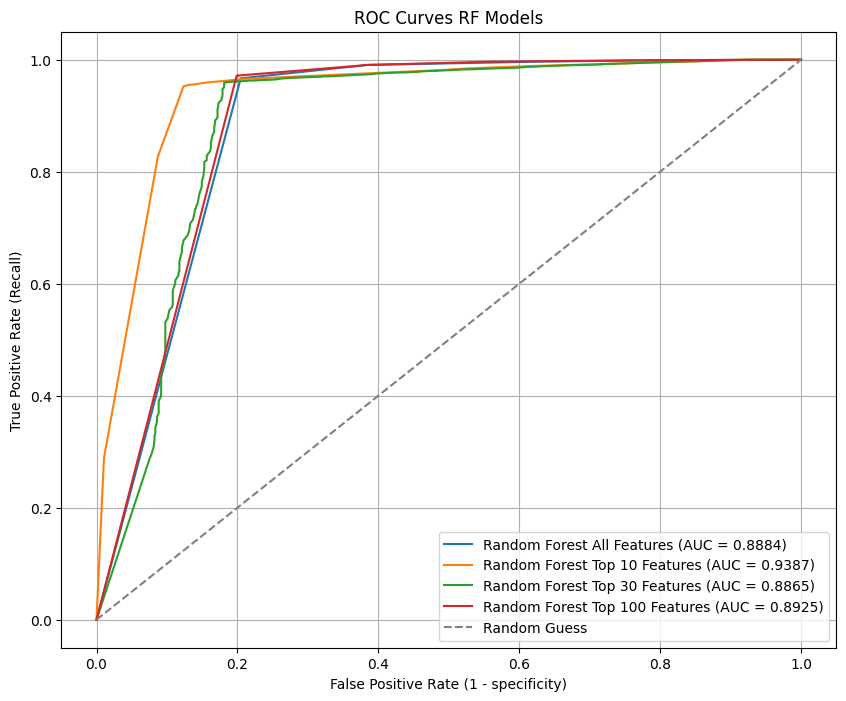


AUC Summary
Random Forest All Features AUC: 0.8884
Random Forest Top 10 Features AUC: 0.9387
Random Forest Top 30 Features AUC: 0.8865
Random Forest Top 100 Features AUC: 0.8925

Model Performance Summary
                 Model  Accuracy  Precision   Recall  F1 Score
         Random Forest  0.987190   0.990414 0.996641  0.993517
 Random Forest (top 10  0.986057   0.986042 1.000000  0.992972
 Random Forest (top 30  0.984907   0.986889 0.997934  0.992381
Random Forest (top 100  0.988092   0.991580 0.996371  0.993970


In [15]:
# plot the roc curves

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

def plot_roc_curve(model, X_test, y_test,label):
    ''' compute and plot the roc curve for a given model'''
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.4f})')
    return roc_auc

# base model all features
auc_rf_all = plot_roc_curve(rf, X_test_scaled, y_test, 'Random Forest All Features')

# top 10
X_test_10 = selector_10.transform(X_test_scaled)
auc_rf_10 = plot_roc_curve(rf_10, X_test_10, y_test, 'Random Forest Top 10 Features')

# top 30
X_test_30 = selector_30.transform(X_test_scaled)
auc_rf_30 = plot_roc_curve(rf_30, X_test_30, y_test, 'Random Forest Top 30 Features')

#top 100
X_test_100 = selector_100.transform(X_test_scaled)
auc_rf_100 = plot_roc_curve(rf_100, X_test_100, y_test, 'Random Forest Top 100 Features')

# plot
plt.plot([0,1],[0,1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curves RF Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# numeric auc summary
print('\nAUC Summary')
print(f'Random Forest All Features AUC: {auc_rf_all:.4f}')
print(f'Random Forest Top 10 Features AUC: {auc_rf_10:.4f}')
print(f'Random Forest Top 30 Features AUC: {auc_rf_30:.4f}')
print(f'Random Forest Top 100 Features AUC: {auc_rf_100:.4f}')

#
print('\nModel Performance Summary')
print(comp_results.to_string(index=False))

##### part 5



Model Performance Summary
                 Model  Accuracy  Precision   Recall  F1 Score
         Random Forest  0.987190   0.990414 0.996641  0.993517
 Random Forest (top 10  0.986057   0.986042 1.000000  0.992972
 Random Forest (top 30  0.984907   0.986889 0.997934  0.992381
Random Forest (top 100  0.988092   0.991580 0.996371  0.993970

Top 5 Features for RF All features
Top features by importance:
  last_pymnt_amnt                      Importance: 0.17722
  last_pymnt_d_Feb-2019                Importance: 0.08410
  last_pymnt_d_Jan-2019                Importance: 0.04908
  last_pymnt_d_0                       Importance: 0.03992
  revol_bal                            Importance: 0.03898


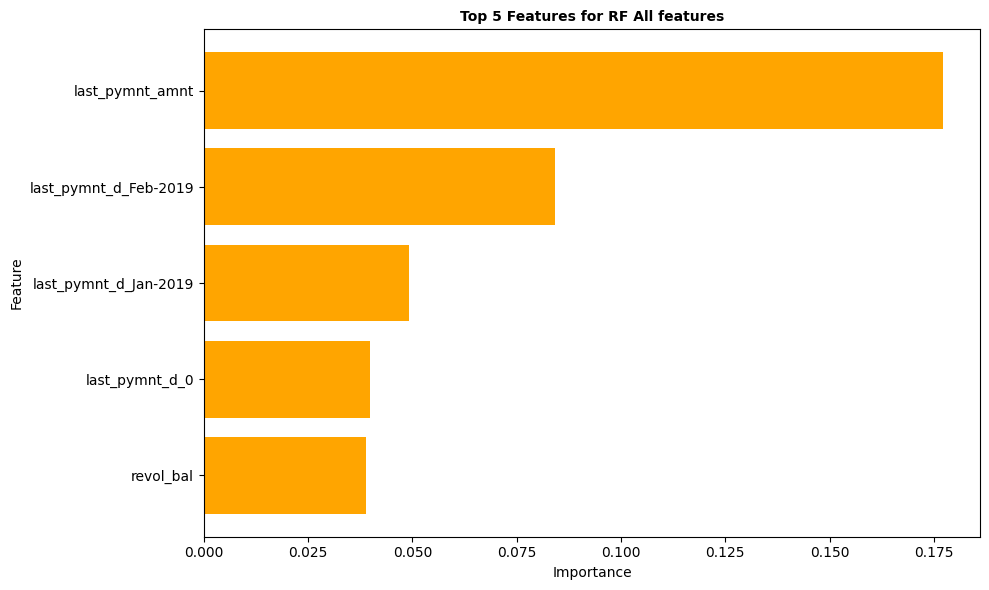


Top 5 Features for RF Top 10 Features
Top features by importance:
  last_pymnt_d_Feb-2019                Importance: 0.46563
  last_pymnt_d_0                       Importance: 0.25385
  last_pymnt_d_Jan-2019                Importance: 0.11864
  last_pymnt_d_Dec-2018                Importance: 0.03431
  last_pymnt_d_Nov-2018                Importance: 0.03256


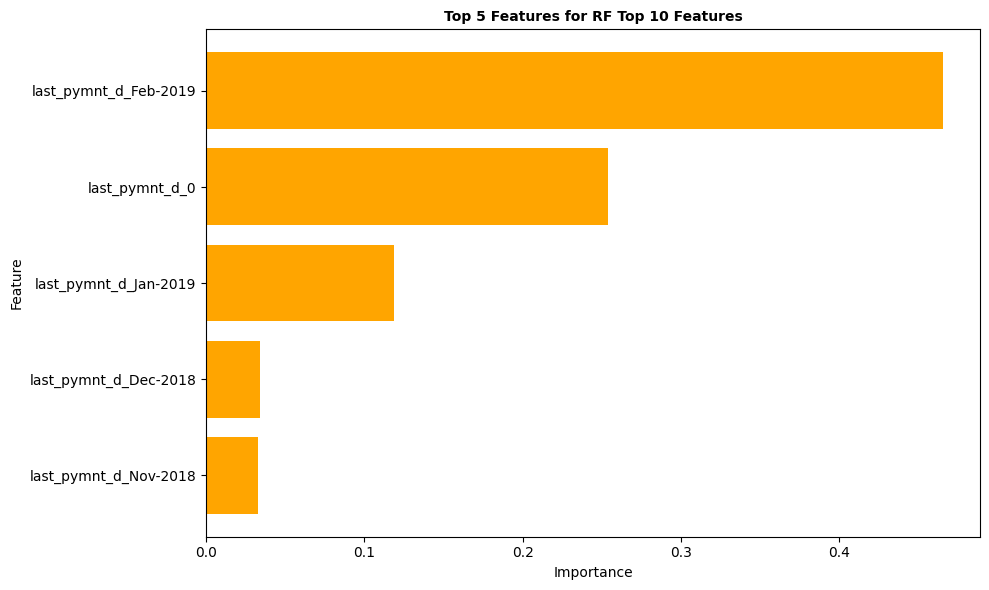


Top 5 Features for RF Top 30 Features
Top features by importance:
  last_pymnt_d_Feb-2019                Importance: 0.41939
  last_pymnt_d_0                       Importance: 0.15660
  int_rate                             Importance: 0.15036
  last_pymnt_d_Dec-2018                Importance: 0.03568
  last_pymnt_d_Nov-2018                Importance: 0.03464


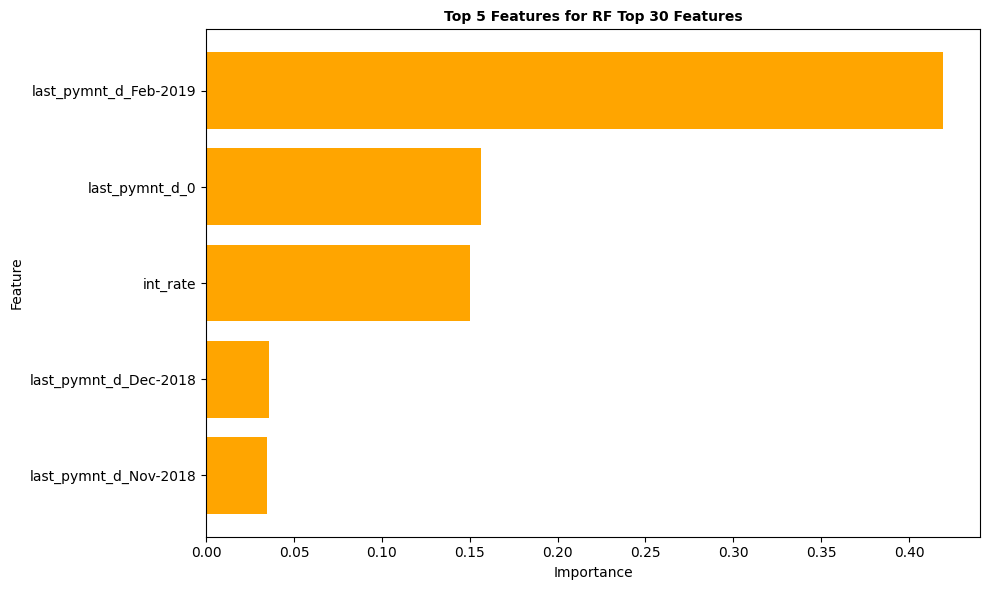


Top 5 Features for RF Top 100 Features
Top features by importance:
  last_pymnt_amnt                      Importance: 0.21756
  last_pymnt_d_Feb-2019                Importance: 0.10348
  installment                          Importance: 0.05688
  last_pymnt_d_Jan-2019                Importance: 0.05204
  funded_amnt_inv                      Importance: 0.04064


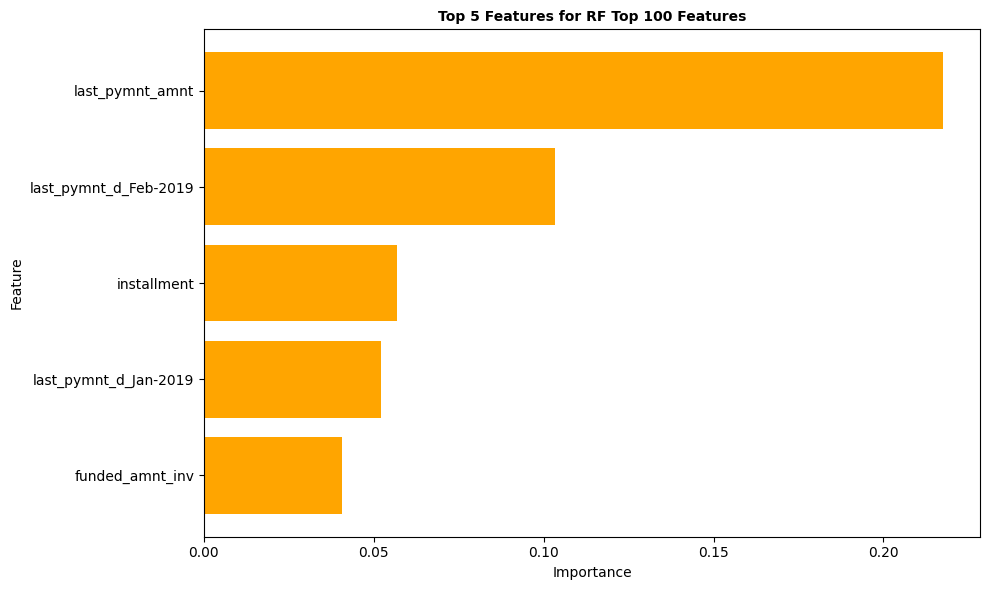

In [16]:
def plot_top(model, selector, feature_names,top_n=5, title='Top Features'):
    selected_features = feature_names[selector.get_support()]
    importance = model.feature_importances_
    top_index = np.argsort(importance)[::-1][:top_n]
    top_features = selected_features[top_index]
    top_importance = importance[top_index]

    print(f"\n{title}")
    print("Top features by importance:")
    for f, imp in zip(top_features, top_importance):
        print(f"  {f:35s}  Importance: {imp:.5f}")

    fi_df = pd.DataFrame({'Feature': top_features, 'Importance': top_importance}).sort_values(by='Importance', ascending=True)

    plt.figure(figsize=(10, 6))
    plt.barh(fi_df['Feature'], fi_df['Importance'], color='orange')
    plt.xlabel('Importance', fontsize=10)
    plt.ylabel('Feature', fontsize=10)
    plt.title(title, fontsize=10, weight='bold')
    plt.tight_layout()
    plt.show()


feature_names = np.array(X_train.columns)

selector_all =SelectKBest(score_func=chi2, k=X_train_scaled.shape[1]).fit(X_train_scaled,y_train)

print('\nModel Performance Summary')
print(comp_results.to_string(index=False))

plot_top(rf, selector_all, feature_names, 5, 'Top 5 Features for RF All features')
plot_top(rf_10, selector_10, feature_names, 5, 'Top 5 Features for RF Top 10 Features')

plot_top(rf_30, selector_30, feature_names, 5, 'Top 5 Features for RF Top 30 Features')
plot_top(rf_100, selector_100, feature_names, 5, 'Top 5 Features for RF Top 100 Features')


# <font color='blue'> Problem 2:  Boosting (26 pts) </font>
In this problem, you are asked to implement AdaBoost with decision stumps (basically, depth-1 decision trees) and apply it to classify data in 'spamdata.mat'. Select the number of boosting rounds $T^{*}$ from $\mathcal{T}=\{100,200, \ldots, 1000\}$; how did you choose this parameter? Plot the errors on the training and test sets as functions of the number of rounds of boosting $t \in\left[1, T^{*}\right]$.
[Note: If you want to write the code from scratch yourself, you do not have to follow the suggested code structure given below.]

**Part 1: Decision Stump (10 pts)**
Adaboost is one of the oldest boosting algorithm, capable of converting an ensemble of weak classifiers into a strong classifier. We will use [Decision Stumps](https://en.wikipedia.org/wiki/Decision_stump) as our base (weak) classifiers.

**Part 2: Adaboost (10 pts)**
This is the same algorithm as we learned in class. You create a new weak learner based on the current sample weights, compute the error of the created weak learner, compute the new learner's weight using the formula $w_{t}=\frac{1}{2} \log \left(\frac{1}{\epsilon_{t}}-1\right)$, and finally update the sample weights. In the next iteration, identify a new weak learner based on the updated sample weights.

**Part 3: Boosting (6 pts)**
Use your Decision Stumps and Adaboost algorithms to run boosting.

### Your answer:

In [17]:
from sklearn.datasets import make_classification  # To generate a 2D synthetic classification dataset
from sklearn.model_selection import train_test_split  # To split into training and test sets
from sklearn.metrics import zero_one_loss  # To calculate classification error
from sklearn.tree import DecisionTreeClassifier  # To create decision stumps (weak learners)
import matplotlib.pyplot as plt  # To plot the training/test error curves
import numpy as np  # For math and array operations
import scipy # To load the dataset


In [18]:
# load the dataset
file_path = '/content/drive/MyDrive/ML/spamdata.mat'
mat_data = scipy.io.loadmat(file_path)
data = mat_data['spamdata']
print(data.shape)
print(data[:2])
# view all keys in the dicitonary varable names
print(mat_data.keys())

(4601, 58)
[[6.000e-02 0.000e+00 2.400e-01 0.000e+00 1.000e-01 0.000e+00 0.000e+00
  1.700e-01 1.700e-01 1.700e-01 0.000e+00 1.000e-01 3.000e-02 0.000e+00
  0.000e+00 3.000e-02 0.000e+00 0.000e+00 4.500e-01 0.000e+00 2.000e-01
  0.000e+00 3.000e-02 0.000e+00 1.180e+00 1.220e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.360e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  6.000e-02 0.000e+00 4.500e-01 0.000e+00 0.000e+00 0.000e+00 1.790e-01
  3.050e-01 2.900e-02 2.900e-02 1.100e-02 2.300e-02 2.813e+00 2.600e+01
  2.510e+03 1.000e+00]
 [0.000e+00 0.000e+00 2.000e-01 0.000e+00 4.000e-01 2.000e-01 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 6.100e-01 4.000e-01 2.450e+00 2.000e-01 6.100e-01
  4.490e+00 6.100e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+0

#### Part 1: Decision Stump (10 pts)

In [19]:
import numpy as np
from operator import lt,ge

class DecisionStump:
    """
    A simple decision stump classifier
    dim : dimension on which to split
    value : value of the dimension
    op : comparator function (either <, <, >= or <=)
    """
    def __init__(self, dim=0, value=0, op=lt):
        self.dim = dim
        self.value = value
        self.op = op

    def update(self, dim=None, value=None, op=None):
        if dim is not None: self.dim = dim
        if value is not None: self.value = value
        if op is not None: self.op = op

    def predict(self,X):
        ''' Predicts the class labels for all samples in X using the larned stump rule'''
        return np.array([1 if self.op(x, self.value) else -1 for x in X[:,self.dim]])

    """
    Fit a one-dimensional Decision Stump classifier.
    You should identify the dimension which results in the best split and find the corresponding optimal
    feature threshold value.
    To facilitate the search for the optimal splitting dimension, this function is called by the fit_data
    function for every dimension.
    """
    def fit_dim(self,X,Y,sample_weights,num_splits):
        """
        Input:
        X and Y are the input data and labels, respectively.
        sample_weights are the iterated weights (initialized as (1/m,1/m,1/m,...,1/m))
        num_splits is the number of possible threshold values used for splitting the
        data (we discretize possible threshold values, find the optimal one); this value
        should be less than the number of samples for the sake of computational efficiency.

        Return:
        min_err: the minimum classification error
        split_value: the optimal threshold
        op: optimal operator (i.e., either >, <, >=, or <=)
        """
        n = X.shape[0] # total number of traiing samples
        min_err =float('inf') # initialize min error as infinity
        split_value = None # best threshold found
        op = None # best operator found so far

        feature_values = X[:,self.dim] # get values for feature
        thresholds = np.random.choice(feature_values, num_splits, replace=True)

        # loop through all
        for thresh in thresholds:
            preds_lt = np.where(feature_values < thresh, -1, 1) # [redoct 1 of featire < thresh else -1]
            err_lt = np.sum(sample_weights * (preds_lt != Y))


            # test the >= conditions
            preds_ge = np.where(feature_values >= thresh, -1, 1) # predict 1 if fearue >= thresh else -1

            err_ge = np.sum(sample_weights * (preds_ge != Y)) # weighted error for the rule

            # if eithers improves min error record it
            if err_lt < min_err:
                min_err = err_lt
                split_value = thresh
                op = lt
            if err_ge < min_err:
                min_err = err_ge
                split_value = thresh
                op = ge

        # returns the best split for the dimension or this branch
        return min_err,split_value,op

    """
    Finding an optimal splitting dimension and the corresponding feature threshold value
    X : n x d data matrix, n number of samples with d dimension
    Y : n dimensional array containing label of each observation, label = {-1,1}
    sample_weights : weight of each observation
    num_splits : number of split value to be tested randomly

    """
    def fit_data(self,X,Y,sample_weights,num_splits=100):
        """
        Input:
        X and Y are the input data and labels, respectively.
        sample_weights are the iterated weights (initialized as (1/m,1/m,1/m,...,1/m))
        num_splits is the number of possible threshold values used for splitting the
        data (we discretize possible threshold values, find the optimal one); this value
        should be less than the number of samples for the sake of computational efficiency.
        There is no return in this funtion
        you can use update() to assign the optimal value of self.dim, self.value and self.op
        """
        n_features = X.shape[1] # number of features
        best_err = np.inf # initialize best weight error
        best_dim = 0 # initialize best dimension
        best_values = 0 #initialize best values
        best_op = lt # initialize for best operation

        # iterate over each feature to find the best
        for i in range(n_features):
            orig_dim = self.dim  # stor original dim
            self.dim = i  # set the current feature
            err, value, op = self.fit_dim(X,Y,sample_weights,num_splits)
            self.dim = orig_dim  # reset the dimension

            if err < best_err:
                best_err = err
                best_dim = i
                best_values = value
                best_op = op
            # update final stump
        self.update(best_dim, best_values, best_op)
        return best_err
        print(best_err)


#### Part 2: Adaboost (10 pts)

In [20]:
class Adaboost:
    def __init__(self, n, weak_learners=None, learner_weights=None):
        self.weak_learners = weak_learners if weak_learners is not None else []
        # list that stores all decision stump objects used
        self.learner_weights = learner_weights if learner_weights is not None else [] # list that stores the at values fore each weak learner
        self.sample_weights = np.repeat(1/n,n) # 1/n fore each sample

    def add_learner(self, X, Y, weak_learner_class = DecisionStump):
        """
        In this function, Adaboost completes one iteration
        Please use the class DecisionStump and its member functions you definted above.

        X : n x d data matrix, n is the number of samples in d dimensions
        Y : n dimensional array containing label of each observation, label in {-1,1}
        weak_learner_class is default: DecisionStump
        Notice: you need to use a list to append all the weak learner objects and their weights here
        """
        stump = weak_learner_class() # initialize a new stump object
        stump.fit_data(X,Y, self.sample_weights) # train the stump and use the current sample weights
        # predict
        predictions = stump.predict(X) # h_t(x_1) use the current weak learner

        # compute the weight class error (ε_t) fyi misclassifieds cotnriute the error if weights are high
        err = np.sum(self.sample_weights * (predictions !=Y)) # ε_t = ∑ D[i] * indicator(h_t(x_i) ≠ y_i)

        # cap small errors through log(0) errors
        if err == 0:
            err = 1e-10 # almost zero avoids crashlog
        # computer the learner weight importance a_t based on error ε_t
        ''' lower error -> hight alpha mean there is more influence in final predictions'''
        alpha = 0.5 * np.log((1 - err)/ err) # α_t = ½ * log((1 - ε_t) / ε_t)

        # update sample weights D focus onmisclassified points
        # D[i] ← D[i] * exp(-α_t * y_i * h_t(x_i))
        # If y_i ≠ h_t(x_i), then y_i * h_t(x_i) = -1 → D[i] increases
        self.sample_weights = self.sample_weights * np.exp(-alpha * Y * predictions)

        # normalize weights to keep d a valid probability or basically to keep it to sum to one
        self.sample_weights /= np.sum(self.sample_weights)

        # say the current stump(model) and its alpha weight
        self.weak_learners.append(stump)
        self.learner_weights.append(alpha)
        # print the diagnostic info for each round
        print(f'Round {len(self.weak_learners)} : Weight Error ={err:.4f}, Alpha = {alpha:.4f}')
    def predict(self,X):
        """
        You can use this function to return predicted label using the iterated strong model.
        The current iterated strong model H(t) consists of t weak learners we saved before
        H(x)= sign E
        """
        if not self.weak_learners:
            return np.zeros(X.shape[0])
        predictions = np.zeros(X.shape[0])

        for alpha, stump in zip(self.learner_weights, self.weak_learners):
            predictions += alpha * stump.predict(X)
        return np.sign(predictions)

    def prediction_error(self,X,Y):
        """
        You can use this function to return the predicted error using the iterated strong model
        """
        error = np.mean(self.predict(X) != Y)
        return error

#### Part 3: Boosting (6 pts)


In [21]:
import random
import matplotlib.pyplot as plt
import scipy.io


def plot_results(train_error, test_error):
    """
    Plot error on the training and test set as a function
    of the number of rounds of boosting.
    """
    plt.figure(figsize=(10, 6))
    # Plot test and train errors
    plt.plot(range(1, len(train_error) + 1), train_error, label="Training Error", color="blue", linewidth=2)
    plt.plot(range(1, len(test_error) + 1), test_error, label="Test Error", color="red", linewidth=2)

    # Add labels and title
    plt.xlabel("Number of Boosting Rounds (T)")
    plt.ylabel("Classification Error Rate")
    plt.title("Training vs Test Error During AdaBoost")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()





In [22]:
from sklearn.model_selection import train_test_split



#Read in the dataset
dataFile = '/content/drive/MyDrive/ML/spamdata.mat'
data = scipy.io.loadmat(dataFile)['spamdata']
X = data[:,0:57]
y = data[:,57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=50)

# normalize data
X_train = np.log(X_train + 0.1 * np.ones((len(X_train), len(X_train[0]))))
X_test = np.log(X_test + 0.1 * np.ones((len(X_test), len(X_test[0]))))
y_train = 2 * y_train - 1
y_test = 2 * y_test - 1

#Maximum number of weak learners to be used in Adaboost
max_num_weak_learners = 1000

#Train and test error
train_error = []
test_error = []

#Training Adaboost with weak learners
n,d = X_train.shape
model = Adaboost(n)
for m in range(1, max_num_weak_learners + 1):
    print("Training Adaboost with weak learners %d" % m)
    model.add_learner(X_train, y_train)
    train_error.append(model.prediction_error(X_train, y_train))
    test_error.append(model.prediction_error(X_test, y_test))



Training Adaboost with weak learners 1
Round 1 : Weight Error =0.7962, Alpha = -0.6815
Training Adaboost with weak learners 2
Round 2 : Weight Error =0.7564, Alpha = -0.5665
Training Adaboost with weak learners 3
Round 3 : Weight Error =0.7266, Alpha = -0.4886
Training Adaboost with weak learners 4
Round 4 : Weight Error =0.7136, Alpha = -0.4564
Training Adaboost with weak learners 5
Round 5 : Weight Error =0.6945, Alpha = -0.4106
Training Adaboost with weak learners 6
Round 6 : Weight Error =0.6398, Alpha = -0.2873
Training Adaboost with weak learners 7
Round 7 : Weight Error =0.6138, Alpha = -0.2317
Training Adaboost with weak learners 8
Round 8 : Weight Error =0.6282, Alpha = -0.2622
Training Adaboost with weak learners 9
Round 9 : Weight Error =0.6141, Alpha = -0.2324
Training Adaboost with weak learners 10
Round 10 : Weight Error =0.6000, Alpha = -0.2027
Training Adaboost with weak learners 11
Round 11 : Weight Error =0.5788, Alpha = -0.1589
Training Adaboost with weak learners 12

KeyboardInterrupt: 

Initial Training Error=0.2084 Testing Error= 0.2103 
Final Training Error=0.0307 Testing Error= 0.0599 


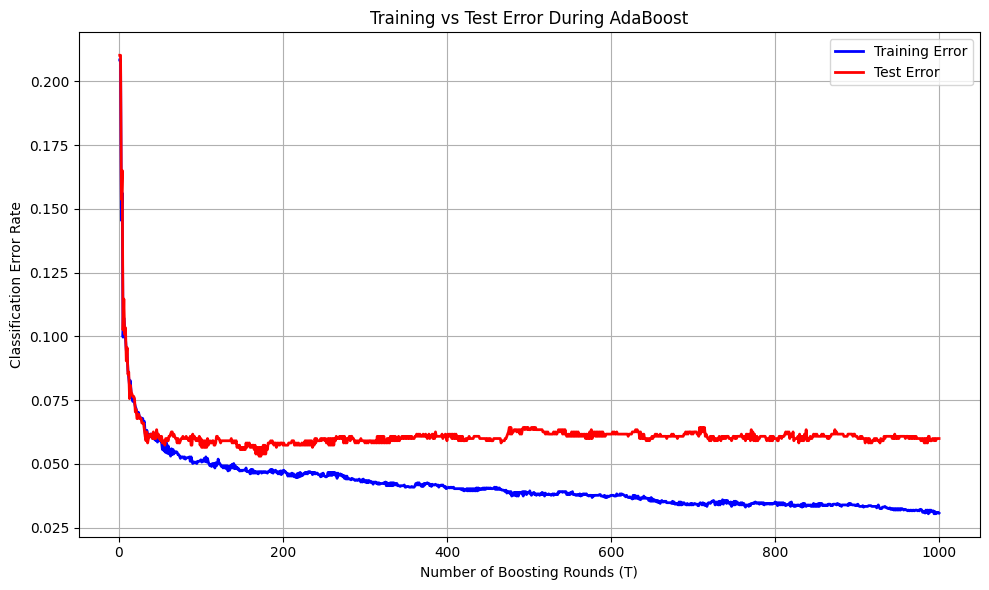

In [31]:
print("Initial Training Error=%.4f Testing Error= %.4f " % (train_error[0], test_error[0]))
print("Final Training Error=%.4f Testing Error= %.4f " % (train_error[-1], test_error[-1]))
plot_results(train_error, test_error)

# <font color='blue'> Problem 3: Comparing different classification ensembles method (22 pts) </font>

In this problem, we will compare performance of different ensemble methods for classification: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [GradientBoosting](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) classifiers.

[Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase) of UCI will be used ('spamdata.mat', exactly the same dataset we used in Problem 2).

* Load the data and partition it into features (X) and the target label (y) for classification task. Then, use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split data into training and testing: test_size=0.33, random_state=42.



**Part 1: (5 pts)** Use a Decision Tree Classifier with random_state = 10 and Logistic Regression with random_state = 10 and solver ="lbfgs" for the spam classification problem. Report the accuracy_score and roc_auc_score on the test data for each classifier.


**Part 2: (5 pts)** Create an ensemble of 50 classifiers (i.e., n_estimators = 50) with random_state = 10 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifiers being Decision Tree Classifier and Logistic Regression from part $1$ . Report accuracy_score and roc_auc_score on the test data for both Bagging classifiers. Compare the results and briefly explain the effect of using bagging for the spam classification problem for both the Logistic Regression and Decision Tree base classifiers.

**Part 3: (5 pts)** Use a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to classify whether an email is spam. Report your testing accuracy ([accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score). You will need [predict_proba](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) for roc_auc_score.


**Part 4: (5 pts)** Use [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem.  Report  accuracy_score and roc_auc_score on the test data for each algorithm.

  Note : For part 3 and 4 find the best values for the hyper parameters of each of the models by using GridSearchCV.


**Part 5: (2 pts)** Briefly explain which of the three ensemble method above from Part 3 & 4 performed the best and why?

### Your answer:

#### Loading and pre-processing dataset

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
import scipy.io
from sklearn.preprocessing import StandardScaler


#Read in the dataset
dataFile = '/content/drive/MyDrive/ML/spamdata.mat'
data = scipy.io.loadmat(dataFile)['spamdata']
x_total = data[:,0:57]
y_total = data[:,57]
x_train, x_test, y_train, y_test = train_test_split(x_total, y_total, test_size=0.33, random_state=42)

#### Part 1 (**5 pts**)

In [24]:
# decision tree classifier
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
y_proba_dt = dt_model.predict_proba(x_test)[:,1]# needed for roc auc

acc_dt = accuracy_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)

# logicstic regreesion
lr_model = LogisticRegression(random_state=10, solver='lbfgs', max_iter=5000)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
y_proba_lr = lr_model.predict_proba(x_test)[:,1]

acc_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

print(f'Decision Tree Classifier - Accuracy= {acc_dt:.4f}, ROC-AUC= {auc_dt:.4f}')
print(f'Logistic Regression - Accuracy= {acc_lr:.4f}, ROC-AUC= {auc_lr:.4f}')

Decision Tree Classifier - Accuracy= 0.9039, ROC-AUC= 0.9039
Logistic Regression - Accuracy= 0.9250, ROC-AUC= 0.9745


#### Part 2 (**5 pts**)

In [25]:
print('Bagging Classifier\n')
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=10), n_estimators=50, random_state=10)

bag_model.fit(x_train, y_train)
y_pred_bag = bag_model.predict(x_test)
y_proba_bag = np.mean([est.predict_proba(x_test)[:,1]for est in bag_model.estimators_], axis=0)

acc_bag = accuracy_score(y_test, y_pred_bag)
auc_bag = roc_auc_score(y_test, y_proba_bag)



bag_lr = BaggingClassifier(estimator=LogisticRegression(random_state=10, solver='lbfgs', max_iter=5000), n_estimators=50, random_state=10)

bag_lr.fit(x_train, y_train)
y_pred_bag_lr = bag_lr.predict(x_test)
y_proba_bag_lr = np.mean([est.predict_proba(x_test)[:,1]for est in bag_lr.estimators_], axis=0)

acc_bag_lr = accuracy_score(y_test, y_pred_bag_lr)
auc_bag_lr = roc_auc_score(y_test, y_proba_bag_lr)

print(f'Bagging Classifier - Accuracy= {acc_bag:.4f}, ROC-AUC= {auc_bag:.4f}')
print(f'Bagging Logistic Regression - Accuracy= {acc_bag_lr:.4f}, ROC-AUC= {auc_bag_lr:.4f}')


Bagging Classifier

Bagging Classifier - Accuracy= 0.9414, ROC-AUC= 0.9800
Bagging Logistic Regression - Accuracy= 0.9282, ROC-AUC= 0.9762


Bagging reduces variance by averaging multiple models trained on bootstrapped samples.

This most likely will improve unstable models like decision tress more than stable ones like logistic regression.

#### Part 3 (**5 pts**)

In [26]:
print('Random Forest Classifier\n')

# define a grid for RF
rf_para_grid = {"n_estimators":[50,100,200],"max_depth":[None,10,20],"min_samples_split":[2,5,10]}

rf = RandomForestClassifier(random_state=10)
rf_grid = GridSearchCV(rf, rf_para_grid, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(x_train, y_train)

rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(x_test)
y_proba_rf = rf_best.predict_proba(x_test)[:,1]

acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

print(f'Best Random Forest Params: {rf_grid.best_params_}')
print(f'Random Forest Classifier - Accuracy= {acc_rf:.4f}, ROC-AUC= {auc_rf:.4f}')

Random Forest Classifier

Best Random Forest Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Classifier - Accuracy= 0.9500, ROC-AUC= 0.9877


#### Part 4 (**5 pts**)

In [27]:
print('Gradient Boosting Classifier\n')
gb_param_grid={"n_estimators":[50,100,200],"max_depth":[2,3,5],"learning_rate":[0.05,0.1,0.2]}

gb_model = GradientBoostingClassifier(random_state=10)
grid_gb = GridSearchCV(gb_model, gb_param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_gb.fit(x_train, y_train)

gb_best = grid_gb.best_estimator_
y_pred_gb = gb_best.predict(x_test)
y_proba_gb = gb_best.predict_proba(x_test)[:,1]

acc_gb = accuracy_score(y_test, y_pred_gb)
auc_gb = roc_auc_score(y_test, y_proba_gb)



#ADABOOST
print('\nAdaBoost Classifier\n')
ada_param_grid={"n_estimators":[50,100,200],"learning_rate":[0.05,1.0,1.5]}

ada_model = AdaBoostClassifier(random_state=10)
grid_ada = GridSearchCV(ada_model, ada_param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_ada.fit(x_train, y_train)
best_ada = grid_ada.best_estimator_
y_pred_ada = best_ada.predict(x_test)
y_proba_ada = best_ada.predict_proba(x_test)[:,1]

acc_ada = accuracy_score(y_test, y_pred_ada)
auc_ada = roc_auc_score(y_test, y_proba_ada)

print(f'Best Gradient Boosting Params: {grid_gb.best_params_}')
print(f'Gradient Boosting Classifier - Accuracy= {acc_gb:.4f}, ROC-AUC= {auc_gb:.4f}')

print(f'Best AdaBoost Params: {grid_ada.best_params_}')
print(f'AdaBoost Classifier - Accuracy= {acc_ada:.4f}, ROC-AUC= {auc_ada:.4f}')


Gradient Boosting Classifier


AdaBoost Classifier

Best Gradient Boosting Params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Gradient Boosting Classifier - Accuracy= 0.9566, ROC-AUC= 0.9879
Best AdaBoost Params: {'learning_rate': 1.0, 'n_estimators': 200}
AdaBoost Classifier - Accuracy= 0.9480, ROC-AUC= 0.9811


#### Part 5 (**2 pts**)

In [51]:
print('\n Performance comparison summary')
summary = pd.DataFrame({"Model":[
    'Decision Tree',
    'Logistic Regression',
    'Bagging(DT)',
    'Bagging(LR)',
    'Random Forest',
    'Gradient Boosting',
    'AdaBoost'],
    "Accuracy":[
        acc_dt,
        acc_lr,
        acc_bag,
        acc_bag_lr,
        acc_rf,
        acc_gb,
        acc_ada],
    "ROC-AUC":[
        auc_dt,
        auc_lr,
        auc_bag,
        auc_bag_lr,
        auc_rf,
        auc_gb,
        auc_ada]})
print(summary)


 Performance comparison summary
                 Model  Accuracy   ROC-AUC
0        Decision Tree  0.903884  0.903872
1  Logistic Regression  0.924951  0.974455
2          Bagging(DT)  0.941409  0.979995
3          Bagging(LR)  0.928242  0.976222
4        Random Forest  0.949967  0.987677
5    Gradient Boosting  0.956550  0.987866
6             AdaBoost  0.947992  0.981088


The best model is the gradient boosting classifier. it received the hightest overall accuracy of 95.66 and the highest ROC. GB is a swquential learning, so during learning each new tree will focus on correcting errors on the previous ensemble. GB reduces both bias and variance and it does it through iterative error correction mechanism giving it a stronger predictive fit on structured datasets.

# <font color='blue'> Problem 4: Support Vector Machines (15 pts) </font>
Let us revisit the task of classifying e-mails as spam vs. not spam. To solve this problem, we will use the SVM with a polynomial kernel. You are allowed to use any existing [libraries](https://scikit-learn.org/stable/modules/svm.html). You can find the dataset file 'spamdata.mat' in Canvas, just below this assignment. Use the first 3000 examples for training, the last 1600 for testing. Start by randomly splitting the training data into ten equal-sized disjoint sets. For each value of the polynomial degree d = {1, 2, 3, 4}, plot the average cross-validation error as a function of the cost (regularization) parameter C. Vary C from a small value C = $2^{-k}$ to C = $2^{k}$, choosing k so that you see a significant variation in training error (from a very high training error to a low training error). Let ($C^{*}, d^{*}$) be the best pair of parameters you identified; from that point on, fix $C = C^{*}$. Plot the ten-fold cross-validation error and the test errors for the hypotheses obtained as a function of d.

**Part 1: (3 pts)** Load data 'spamdata.mat' with [scipy.io.loadmat](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html) and print out the shape of X and y.

**Part 2: cross validation (8 pts)**
Train the SVM with different kernel degrees and regularization constants. Save the results corresponding to different parameters.

**Part 3: plotting results (4 pts)**
Plot the results corresponding to different parameters and choose the best hyperparameters.

In [28]:
import scipy.io
import numpy as np
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split

### Your answer:

#### Part 1 (**3 pts**)

In [29]:
datafile = scipy.io.loadmat('/content/drive/MyDrive/ML/spamdata.mat')
data= datafile['spamdata']
X = data[:, :57]
y = data[:, 57]

print("X shape:", X.shape)
print("y shape", y.shape)

X shape: (4601, 57)
y shape (4601,)


#### Part 2 (**8 pts**)

In [32]:
from sklearn import svm
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test = X[:3000], X[3000:]
y_train, y_test = y[:3000], y[3000:]

#. c values and polynomial degrees to ttest
C_values = [2**k for k in range(-5, 6, 2)] # 2^5
degrees = [1, 2, 3, 4]

# kfold setup
kf= KFold(n_splits=10, shuffle=True, random_state=42)
X_train_small = X_train[:1000]
y_train_small = y_train[:1000]


# dictionary to store average cv error
cv_errors = {}

for d in degrees:
    errors = []
    for C in C_values:
        clf = svm.SVC(kernel='poly', degree=d, C=C, gamma='scale')
        scores = cross_val_score(clf, X_train_small, y_train_small, cv=kf)
        mean_error = 1 - np.mean(scores)
        errors.append(mean_error)
    cv_errors[d] = errors

#### Part 3 (**4 pts**)

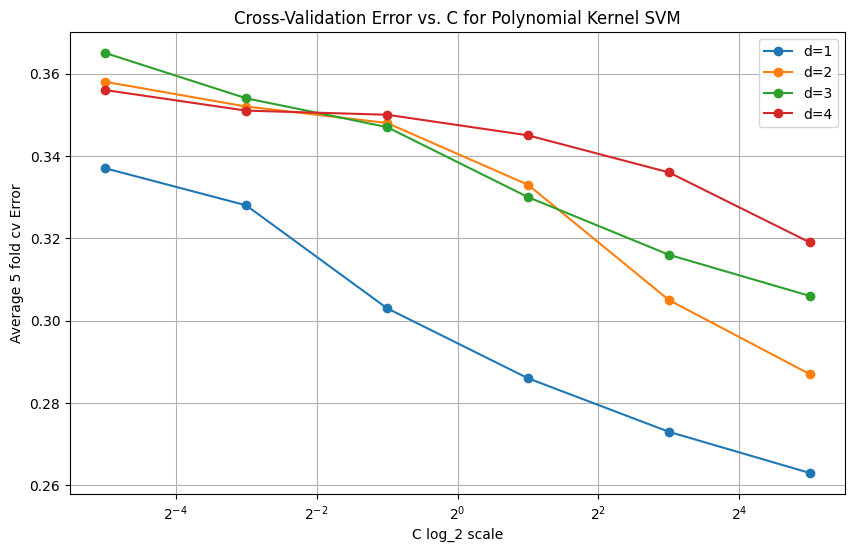

Best parameters: degree=1, C=32, CV error=0.2630
    degree         C  CV error
0        1   0.03125     0.337
1        1   0.12500     0.328
2        1   0.50000     0.303
3        1   2.00000     0.286
4        1   8.00000     0.273
5        1  32.00000     0.263
6        2   0.03125     0.358
7        2   0.12500     0.352
8        2   0.50000     0.348
9        2   2.00000     0.333
10       2   8.00000     0.305
11       2  32.00000     0.287
12       3   0.03125     0.365
13       3   0.12500     0.354
14       3   0.50000     0.347
15       3   2.00000     0.330
16       3   8.00000     0.316
17       3  32.00000     0.306
18       4   0.03125     0.356
19       4   0.12500     0.351
20       4   0.50000     0.350
21       4   2.00000     0.345
22       4   8.00000     0.336
23       4  32.00000     0.319


In [33]:
plt.figure(figsize=(10, 6))
for d in degrees:
    plt.plot(C_values, cv_errors[d], marker='o', label=f'd={d}')
plt.xscale('log', base=2)
plt.xlabel('C log_2 scale')
plt.ylabel('Average 5 fold cv Error')
plt.title('Cross-Validation Error vs. C for Polynomial Kernel SVM')
plt.legend()
plt.grid(True)
plt.show()

best_d, best_C, min_error = None, None, float('inf')
for d in degrees:
    for C, err in zip(C_values, cv_errors[d]):
        if err < min_error:
            best_d, best_C, min_error = d, C, err

print(f"Best parameters: degree={best_d}, C={best_C}, CV error={min_error:.4f}")

# table summary
rows = []
for d in degrees:
    for C, err in zip(C_values, cv_errors[d]):
        rows.append({'degree': d, 'C': C, 'CV error': err})
df_table = pd.DataFrame(rows)
print(df_table)